<h1><center><font color = "20b1fd">  COVID-19 Impact on Digital Learning </font></h1>

 <h2><font color = "20b1fd">  Introduction </font></h2>
- <font color = "#283655" size="3">As a result of the COVID-19 outbreak, colleges and universities around the globe are shifting to online learning as a replacement for on-campus delivery.There's an urgent need to better understand and measure the scope and impact of the pandemic.we are going to do a data analysis to see about how engagement with digital learning relates to factors like district demographics, broadband access, and state/national level policies and events as a better understanding of digital learning trends may help reverse the long-term learning loss among America’s most vulnerable, making education more equitable.</font>



 <h2><font color = "20b1fd">  Objectives </font></h2>
- <font color = "#283655" size="3">Explore the state of digital learning in 2020 and how the engagement of digital learning relates to factors such as district demographics, broadband access, and state/national level policies and events

Below are some examples of questions that relate to our problem statement:
- What is the picture of digital connectivity and engagement in 2020?
- What is the effect of the COVID-19 pandemic on online and distance learning, and how might this also evolve in the future?
- How does student engagement with different types of education technology change over the course of the pandemic?
- How does student engagement with online learning platforms relate to different geography? Demographic context (e.g.,      race/ethnicity, ESL, learning disability)? Learning context? Socioeconomic status?
- Do certain state interventions, practices or policies (e.g., stimulus, reopening, eviction moratorium) correlate with the increase or decrease online engagement?</font>




 <h2><font color = "#20b1fd">  Exploratory Analysis</font> </h2>
 

 <font color = "#283655" size="3"> - In this section, we will perform some exploratory data analysis on our dataframe to get a general idea of what our dataframe consists of and to manipulate it if required.</font> 
<h2><font color = "#20b1fd">Libraries</font> </h2>

In [1]:
# linear algebra and data processing
import numpy as np
import pandas as pd 

#visualisations
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

from wordcloud import WordCloud,STOPWORDS

#missing values
import missingno as msno

# ignnore warnings
import warnings
warnings.filterwarnings("ignore")

 <h2> <font color = "#20b1fd">Data</font></h2>

In [2]:
#load district data
district_df = pd.read_csv("../input/learnplatform-covid19-impact-on-digital-learning/districts_info.csv")
#load product data
product_df = pd.read_csv("../input/learnplatform-covid19-impact-on-digital-learning/products_info.csv")
#load engagement data
engagement_df= pd.read_csv(f'/kaggle/input/learnplatform-covid19-impact-on-digital-learning/engagement_data/1000.csv')



 <h3><font color = "#20b1fd"> District data information </font></h3>
<font color = "#283655" size=3> The district file districts_info.csv includes information about the characteristics of school districts, including data from NCES (2018-19), FCC (Dec 2018), and Edunomics Lab. 

 - <b> district_id </b>: The unique identifier of the school district
 - <b>state</b> : The state where the district resides in
 - <b>locale </b>: NCES locale classification that categorizes U.S. territory into four types of areas: City, Suburban, Town, and Rural.
 - <b>pct_black/hispanic </b>: Percentage of students in the districts identified as Black or Hispanic based on 2018-19 NCES data
 - <b>pct_free/reduced</b> : Percentage of students in the districts eligible for free or reduced-price lunch based on 2018-19 NCES data
 - <b>countyconnectionsratio </b>: ratio (residential fixed high-speed connections over 200 kbps in at least one direction/households)   
 - <b>pptotalraw </b>: Per-pupil total expenditure (sum of local and federal expenditure) from Edunomics Lab's National Education Resource Database on Schools (NERD$) project.</font>
 


In [3]:
%%HTML
<style type="text/css">
table.dataframe td, table.dataframe th {
    border: 1px  black solid !important;
  color: black !important;
}
</style>

In [4]:
district_df.head()

,district_id,state,locale,pct_black/hispanic,pct_free/reduced,county_connections_ratio,pp_total_raw
0,8815,Illinois,Suburb,"[0, 0.2[","[0, 0.2[","[0.18, 1[","[14000, 16000["
1,2685,NaN,NaN,NaN,NaN,NaN,NaN
2,4921,Utah,Suburb,"[0, 0.2[","[0.2, 0.4[","[0.18, 1[","[6000, 8000["
3,3188,NaN,NaN,NaN,NaN,NaN,NaN
4,2238,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
district_df.shape

(233, 7)

-  <font color = "#283655" size="3">  The data include a total of <b>233</b> School Districts from across the United States.</font>

In [6]:
# State unique values
district_df['state'].nunique()

23

-  <font color = "#283655" size="3"> There are 23 states in the dataframe.</font>

In [7]:
# State with the highest frequency
district_df['state'].mode()[0]

'Connecticut'

 -  <font color = "#283655" size="3"> The most occuring state is Connecticut </font>

In [8]:
#basic insight on our columns to understand their properties and datatypes
district_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233 entries, 0 to 232
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   district_id               233 non-null    int64 
 1   state                     176 non-null    object
 2   locale                    176 non-null    object
 3   pct_black/hispanic        176 non-null    object
 4   pct_free/reduced          148 non-null    object
 5   county_connections_ratio  162 non-null    object
 6   pp_total_raw              118 non-null    object
dtypes: int64(1), object(6)
memory usage: 12.9+ KB


In [9]:
# credit: https://www.kaggle.com/parulpandey/a-guide-to-handling-missing-values-in-python
def missing_values_table(df):

        """
        Function which can be used to get an information about missing values

        Inputs: 
        df - pandas DataFrame 

        Returns:dataframe with missing values information
        """
    
        # Total missing values
        mis_val = df.isnull().sum()
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        # Print some summary information
        print ("\nThe dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.\n")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [10]:
#missing values in district dataframe
missing_values_table(district_df)


The dataframe has 7 columns.
There are 6 columns that have missing values.



,Missing Values,% of Total Values
pp_total_raw,115,49.4
pct_free/reduced,85,36.5
county_connections_ratio,71,30.5
state,57,24.5
locale,57,24.5
pct_black/hispanic,57,24.5


<h3><font color = "#20b1fd"> Product data information </font></h3>
<font color = "#283655" size=3> The district file districts_info.csv includes information about the characteristics of school districts, including data from NCES (2018-19), FCC (Dec 2018), and Edunomics Lab. 

 - <b> LP ID </b>: The unique identifier of the product
 - <b>URL</b> : Web Link to the specific product
 - <b>Product Name </b>: Name of the specific product
 - <b>Provider/Company Name </b>: Name of the product provider
 - <b>Sector(s)</b> : Sector of education where the product is used
 - <b>Primary Essential Function </b>: The basic function of the product. There are two layers of labels here. Products are first labeled as one of these three categories: ,LC = Learning & Curriculum, CM = Classroom Management, and SDO = School & District Operations. Each of these categories have multiple sub-categories with which the products were labeled",</font>



In [11]:
product_df.head()


,LP ID,URL,Product Name,Provider/Company Name,Sector(s),Primary Essential Function
0,13117,https://www.splashmath.com,SplashLearn,StudyPad Inc.,PreK-12,LC - Digital Learning Platforms
1,66933,https://abcmouse.com,ABCmouse.com,"Age of Learning, Inc",PreK-12,LC - Digital Learning Platforms
2,50479,https://www.abcya.com,ABCya!,"ABCya.com, LLC",PreK-12,"LC - Sites, Resources & Reference - Games & Si..."
3,92993,http://www.aleks.com/,ALEKS,McGraw-Hill PreK-12,PreK-12; Higher Ed,LC - Digital Learning Platforms
4,73104,https://www.achieve3000.com/,Achieve3000,Achieve3000,PreK-12,LC - Digital Learning Platforms


In [12]:
product_df['Category'] = product_df["Primary Essential Function"].apply(lambda x: pd.Series(str(x).split("-")[0]))


In [13]:
product_df.head()

,LP ID,URL,Product Name,Provider/Company Name,Sector(s),Primary Essential Function,Category
0,13117,https://www.splashmath.com,SplashLearn,StudyPad Inc.,PreK-12,LC - Digital Learning Platforms,LC
1,66933,https://abcmouse.com,ABCmouse.com,"Age of Learning, Inc",PreK-12,LC - Digital Learning Platforms,LC
2,50479,https://www.abcya.com,ABCya!,"ABCya.com, LLC",PreK-12,"LC - Sites, Resources & Reference - Games & Si...",LC
3,92993,http://www.aleks.com/,ALEKS,McGraw-Hill PreK-12,PreK-12; Higher Ed,LC - Digital Learning Platforms,LC
4,73104,https://www.achieve3000.com/,Achieve3000,Achieve3000,PreK-12,LC - Digital Learning Platforms,LC



-  <font color = "#283655" size="3">  There are <b>372</b> distinct Educational Technology Products </font>

In [14]:
#basic insight on our columns to understand their properties and datatypes
product_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 372 entries, 0 to 371
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   LP ID                       372 non-null    int64 
 1   URL                         372 non-null    object
 2   Product Name                372 non-null    object
 3   Provider/Company Name       371 non-null    object
 4   Sector(s)                   352 non-null    object
 5   Primary Essential Function  352 non-null    object
 6   Category                    372 non-null    object
dtypes: int64(1), object(6)
memory usage: 20.5+ KB


In [15]:
#missing values in product dataframe
missing_values_table(product_df)


The dataframe has 7 columns.
There are 3 columns that have missing values.



,Missing Values,% of Total Values
Sector(s),20,5.4
Primary Essential Function,20,5.4
Provider/Company Name,1,0.3


 <h3><font color = "#20b1fd"> Engagement data information  </font></h3>
<font color = "#283655" size=3> 
- The engagement data are aggregated at school district level, and each file in the folder engagement_data represents data from one school district


 - <b> time</b>: date in YYYY-MM-DD
 - <b>lp_id</b> : The unique identifier of the product
 - <b>pct_access </b>: Percentage of students in the district have at least one page-load event of a given product and on a given day
 - <b>engagement_index </b>: Total page-load events per one thousand students of a given product and on a given day  </font>


In [16]:
engagement_df.head()

,time,lp_id,pct_access,engagement_index
0,2020-01-01,93690.0,0.00,NaN
1,2020-01-01,17941.0,0.03,0.90
2,2020-01-01,65358.0,0.03,1.20
3,2020-01-01,98265.0,0.57,37.79
4,2020-01-01,59257.0,0.00,NaN


In [17]:
#missing values in engagement dataframe
missing_values_table(engagement_df)


The dataframe has 4 columns.
There are 2 columns that have missing values.



,Missing Values,% of Total Values
engagement_index,42348,40.7
lp_id,2,0.0


In [18]:
districts = district_df.district_id
for district in districts:
    df= pd.read_csv(f'/kaggle/input/learnplatform-covid19-impact-on-digital-learning/engagement_data/{district}.csv')
    df['district_id']=district
    engagement_df.append(df)

In [19]:

def count_plot(df:pd.DataFrame, column:str ,title:str) -> None:
    """
    Function which can be used to draw a countplot

    Inputs: 
    df - pandas DataFrame 
    column : Column name in string format
    title : title of the plot in string format

    Returns:None

    """
    plt.figure(figsize=(10, 8))
    ax=sns.countplot(data=df, x=column, color = "#20b1fd")
    ax.set_xticklabels(ax.get_xmajorticklabels(), fontsize = 12)
    ax.tick_params(axis='x', rotation=90)
    plt.yticks(fontsize=14)
    plt.xlabel(f'{column}', fontsize=17)
    plt.ylabel("Count", fontsize=17)
    plt.title(title, fontsize = 20,fontname = 'monospace', color = '#283655')
    plt.show()
    


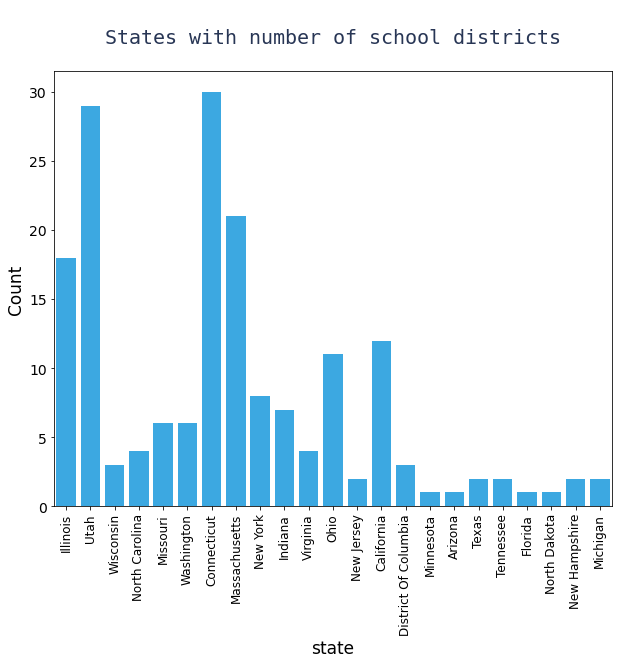

In [20]:
# Number of Districts across States
count_plot(district_df,'state','\nStates with number of school districts\n')


 <font color = "#283655" size=3>
<ul>    
<li>The top three states with the most school districts are Connecticut, Utah, and Massachusetts.</li>
<li>The distribution of the data by State is very unequal.The most populated states like <b>California and Texas</b> are not the ones who provided the most data</li>
</ul>
</font>

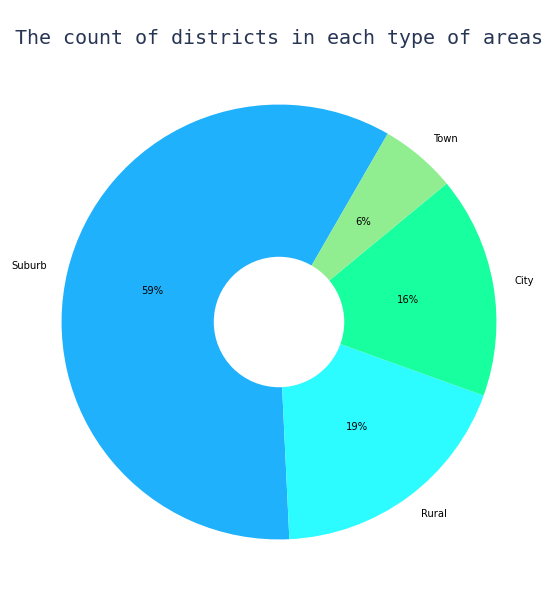

In [21]:
#count of districts in each type of areas
fig, ax  = plt.subplots(figsize=(20, 10))
plt.title('\nThe count of districts in each type of areas', fontsize = 20,fontname = 'monospace', color = '#283655')
label = list(district_df["locale"].value_counts().index)
count = district_df["locale"].value_counts().values
ax.pie(count,startangle=60, labels=label,autopct='%1.0f%%', colors=["#20b1fd","#2cfbff","#18ff9f","#90ee90"])
ax.add_artist(plt.Circle((0,0),0.3,fc='white'))
plt.show()



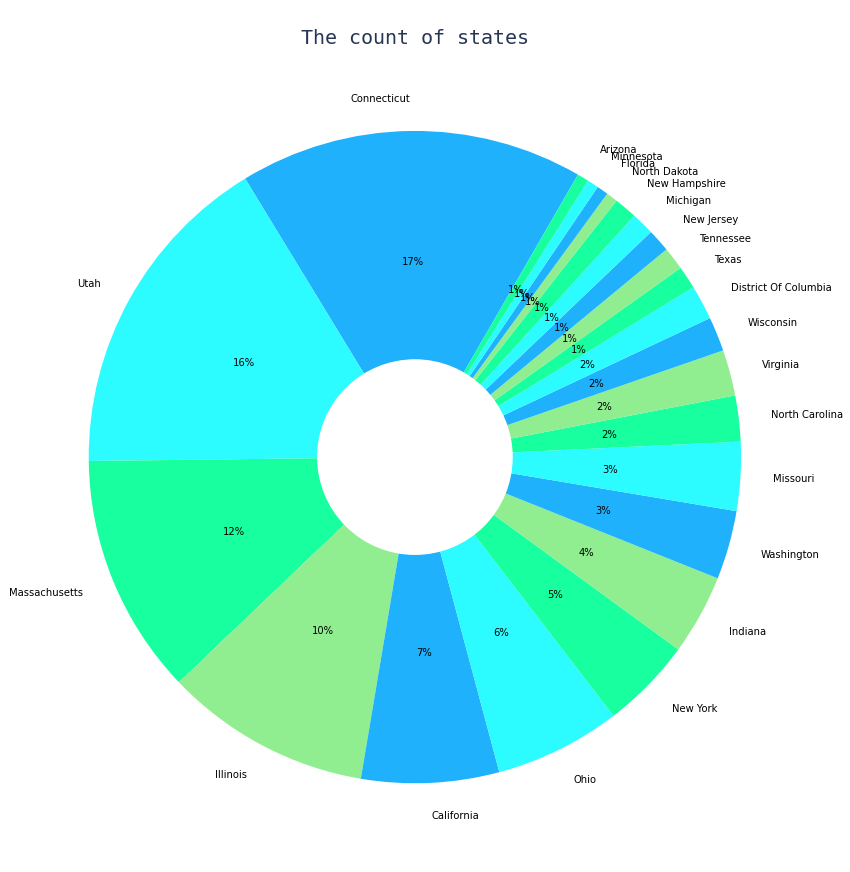

In [22]:
fig, ax  = plt.subplots(figsize=(30, 15))
plt.title('\nThe count of states', fontsize = 20,fontname = 'monospace', color = '#283655')
label = list(district_df["state"].value_counts().index)
count = district_df["state"].value_counts().values
ax.pie(count,startangle=60, labels=label,autopct='%1.0f%%', colors=["#20b1fd","#2cfbff","#18ff9f","#90ee90"])
ax.add_artist(plt.Circle((0,0),0.3,fc='white'))
plt.show()

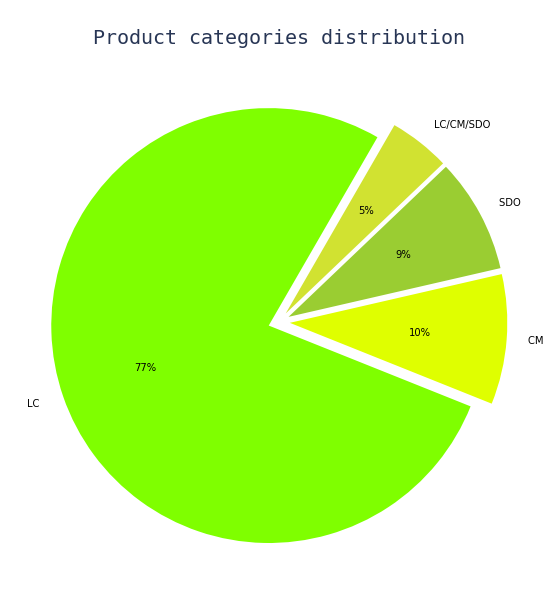

In [23]:
fig, ax  = plt.subplots(figsize=(20, 10))
plt.title('\nProduct categories distribution', fontsize = 20,fontname = 'monospace', color = '#283655')
product_df_clean=product_df.dropna()
explode = (0.05, 0.05, 0.05, 0.05)
label = list(product_df_clean["Category"].value_counts().index)
count = product_df_clean["Category"].value_counts().values
patches0=ax.pie(count,startangle=60, explode=explode,labels=label,autopct='%1.0f%%', colors=["#7fff00","#dfff00","#9acd32","#d1e231"])
plt.show()

<font color = "#283655" size="3"> 
 We can observe that 'Learning & Curriculum' dominates Primary Essential Function, LC category (77%).
<br/><br/> LC = Learning & Curriculum 
<br/> CM = Classroom Management, and 
<br/> SDO = School & District Operations 
</font>

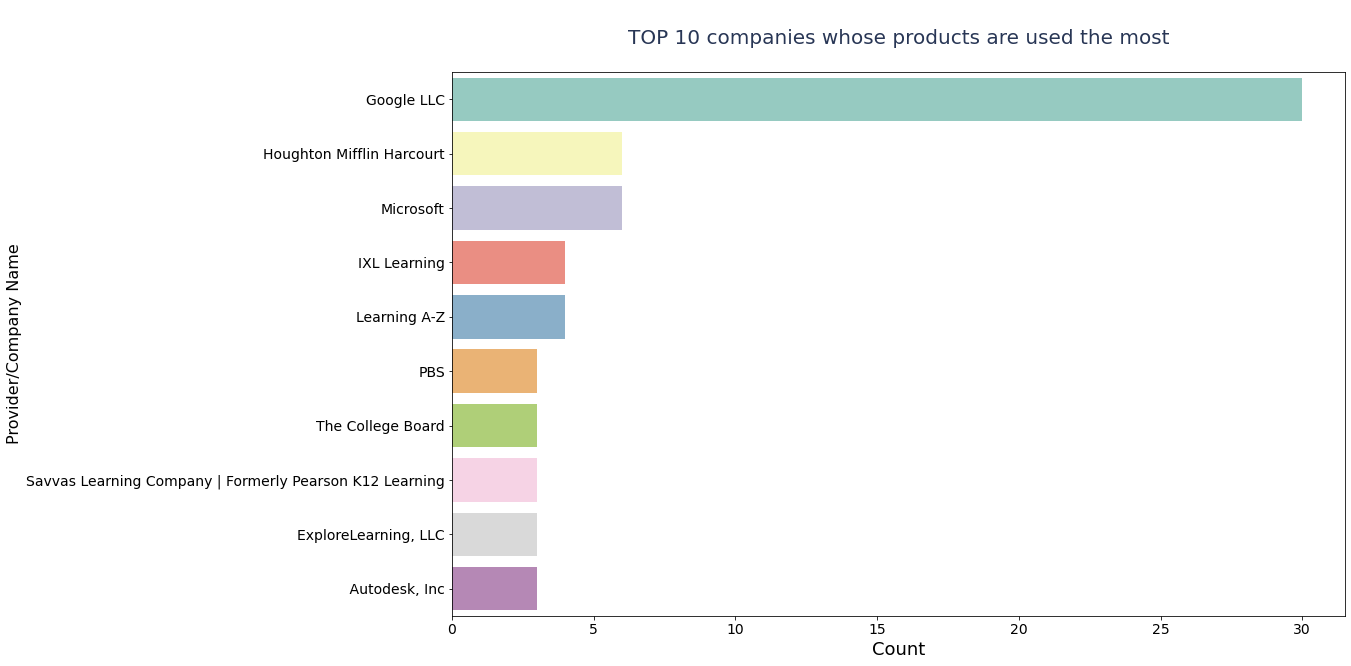

In [24]:
#Top 10 Tech-Products
plt.figure(figsize=(16, 10))
sns.countplot(y='Provider/Company Name', data=product_df, order=product_df["Provider/Company Name"].value_counts().index[:10],palette='Set3')
plt.title('\nTOP 10 companies whose products are used the most\n', fontsize = 20,fontname = 'fantasy', color = '#283655')
plt.xlabel('Count', fontsize=18)
plt.ylabel('Provider/Company Name', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

-  <font color = "#283655" size=3> Google is the company with the most digital education programs, followed by Houghton Mifflin Harcourt, however there is a significant gap between the amount of items they offer. Microsoft ranks third in terms of the number of digital education programs it offers.</font>

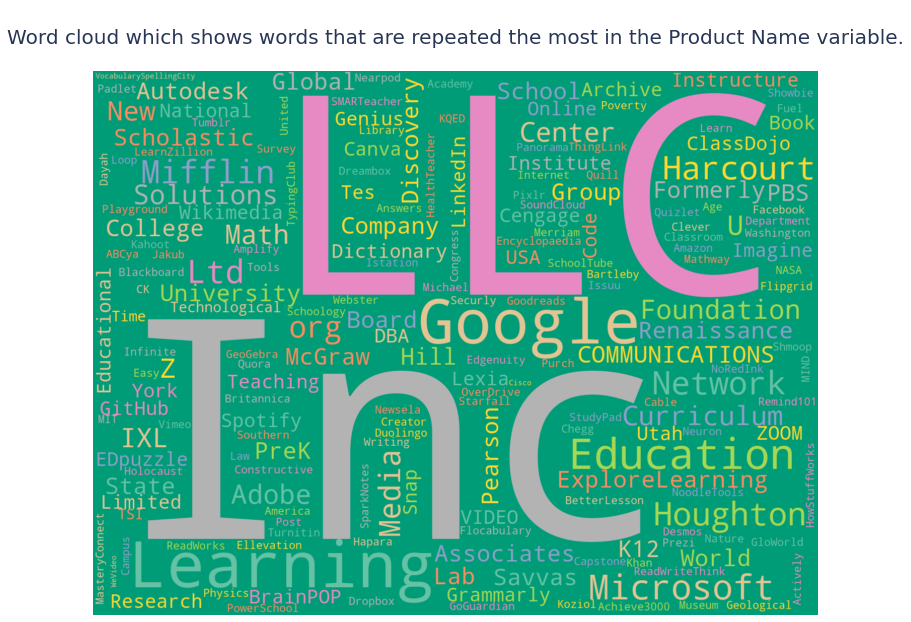

In [25]:

# Generate a word cloud image
wordcloud = WordCloud(width=1440, height=1080,background_color='#009B77', colormap='Set2', collocations=False).generate(" ".join(product_df['Provider/Company Name'].astype(str)))
# Display the generated image
plt.figure(figsize=(30, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('\nWord cloud which shows words that are repeated the most in the Product Name variable.\n', fontsize = 20,fontname = 'fantasy', color = '#283655')
plt.axis("off")
plt.show()



In [26]:
#Distribution of school districts in each locale in each State
locale_state=district_df.groupby("state")["locale"].value_counts()
locale_state.head(10)

state                 locale
Arizona               City       1
California            City       7
                      Suburb     4
                      Rural      1
Connecticut           Suburb    19
                      Rural      9
                      City       2
District Of Columbia  City       3
Florida               Suburb     1
Illinois              Suburb    14
Name: locale, dtype: int64

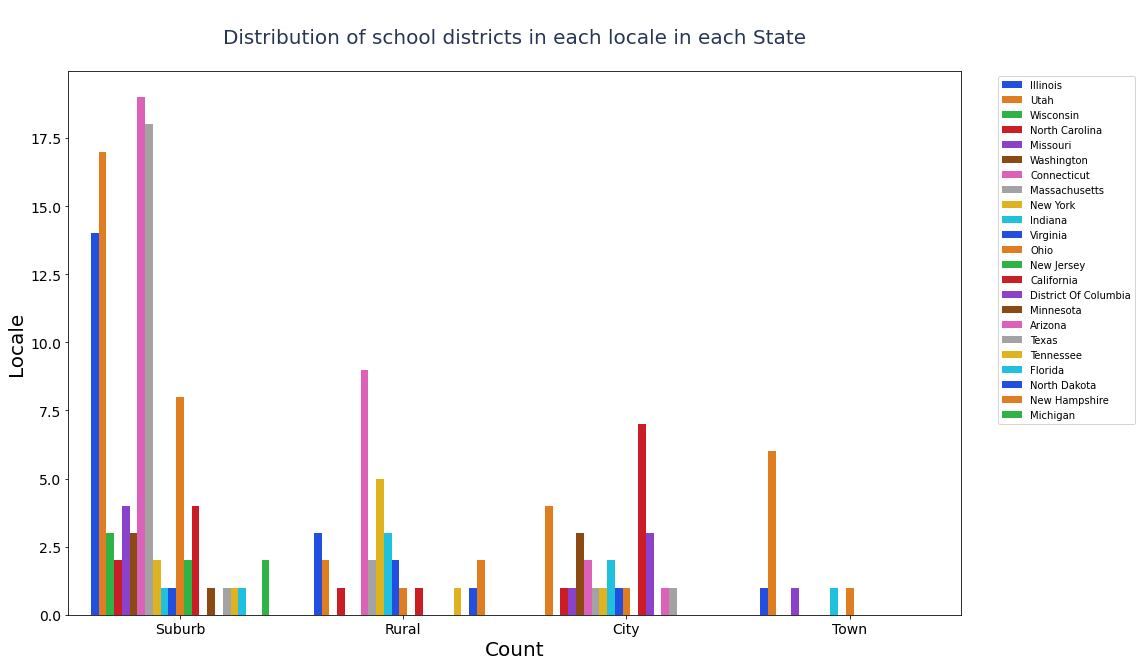

In [27]:
plt.figure(figsize=(16, 10))
g=sns.countplot(data = district_df, x= district_df['locale'],palette='bright', hue='state')
g.legend(bbox_to_anchor= (1.2,1))
plt.title('\nDistribution of school districts in each locale in each State\n', fontsize = 20,fontname = 'fantasy', color = '#283655')
plt.xlabel('Count', fontsize=20)
plt.ylabel('Locale', fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

<font color = "#283655" size=3> From the figure,we can see that **Connecticut** has the most schools in Suburb locale, followed by   **Massachusetts**,and **Utah**.</font>
<ul><font color = "#283655" size=3>
  <li><b>California</b> and <b>Utah</b> has the most schools in City locale</li>
  <li><b>Connecticut</b> has the most schools in Rural locale followed by <b>New York</b></li>
  <li><b>Utah</b> has the maximum number of schools in Town locale</li>
    <li>We Can also see that most of the states expect <b>califronia</b> are made up of the suburbs.</li>
  <li><b>Arizona</b> has schools only in town locales.</li>
  <li>only rural coverage is available in <b>New Hampshire</b> and <b>North Dakota</b> </li>
  <li><b> Florida, Michigan, Minnesota, New Jersey and Wisconsin</b> have 100% suburbs coverage while <b>Columbia</b> have 100% of the data about City. </li>
</font></ul>


In [28]:
district_df.dropna(inplace=True)
district_df['pct_black/hispanic']=district_df['pct_black/hispanic'].apply(lambda x :float(x.split(',')[0][1:])+0.1)
district_df['pct_free/reduced']=district_df['pct_free/reduced'].apply(lambda x :float(x.split(',')[0][1:])+0.1)
district_df['pp_total_raw']=district_df['pp_total_raw'].apply(lambda x :float(x.split(',')[0][1:])+1000)
district_df.head()

,district_id,state,locale,pct_black/hispanic,pct_free/reduced,county_connections_ratio,pp_total_raw
0,8815,Illinois,Suburb,0.1,0.1,"[0.18, 1[",15000.0
2,4921,Utah,Suburb,0.1,0.3,"[0.18, 1[",7000.0
5,5987,Wisconsin,Suburb,0.1,0.1,"[0.18, 1[",11000.0
6,3710,Utah,Suburb,0.1,0.5,"[0.18, 1[",7000.0
7,7177,North Carolina,Suburb,0.3,0.3,"[0.18, 1[",9000.0


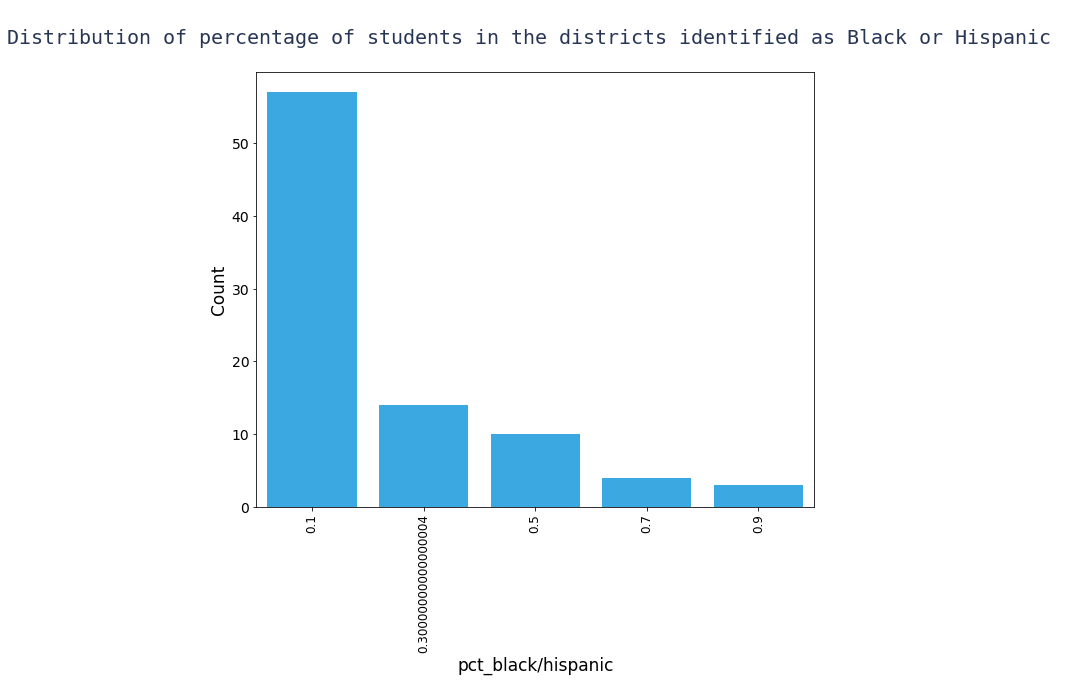

In [29]:
count_plot(district_df,'pct_black/hispanic','\nDistribution of percentage of students in the districts identified as Black or Hispanic \n')

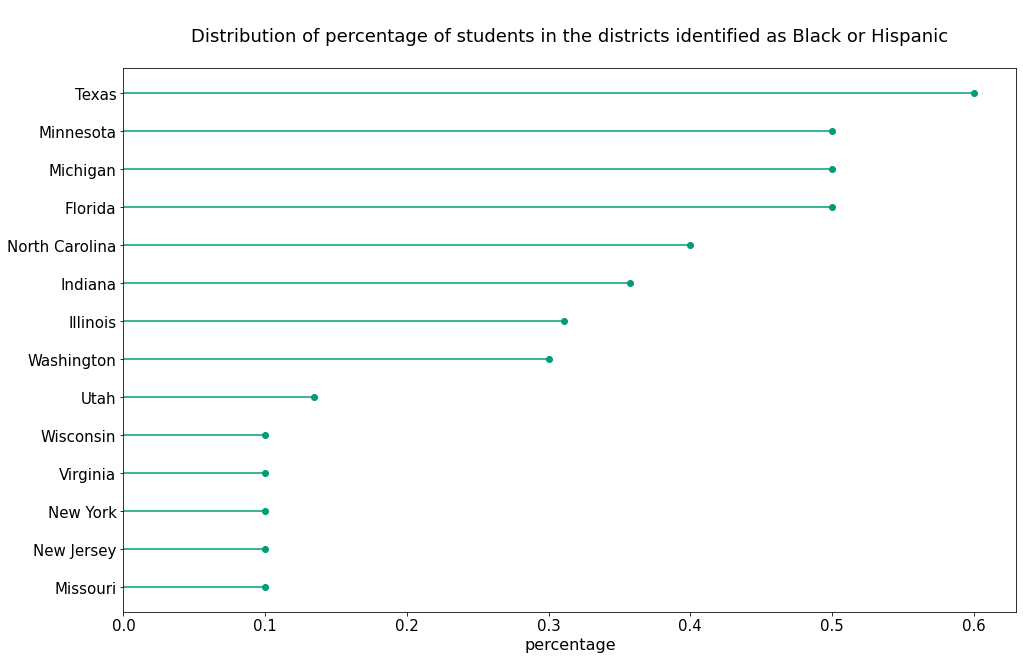

In [30]:
#Distribution of percentage of students in the districts identified as Black or Hispanic plot
state_pct=district_df.groupby('state').agg({'pct_black/hispanic':np.mean}).reset_index()
state_pct_sorted = state_pct.sort_values('pct_black/hispanic',ascending=True).set_index('state')
plt.figure(figsize=(16, 10))
plt.hlines(y=state_pct_sorted .index, xmin=0, xmax=state_pct_sorted,color='#009B77')
plt.plot(state_pct_sorted , state_pct_sorted .index,'o', color='#009B77')
plt.title('\nDistribution of percentage of students in the districts identified as Black or Hispanic\n', fontsize=18)
plt.xlabel('percentage', fontsize=16)
plt.xticks(fontsize=15)
plt.xlim(0, None)
plt.yticks(fontsize=15)
plt.grid(False)
plt.show()



- <font color = "#283655" size=3>Texas has the highest number of black/hispanic representation followed by Minnsota, Michigan and Florida.</font>

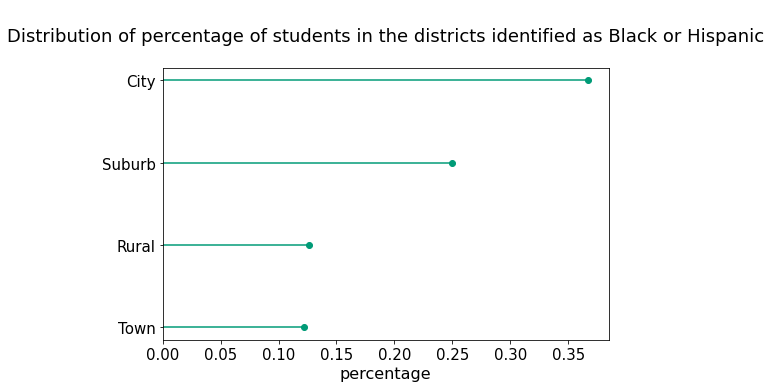

In [31]:
#Distribution of percentage of students in the districts identified as Black or Hispanic plot
locale_pct=district_df.groupby('locale').agg({'pct_black/hispanic':np.mean}).reset_index()
locale_pct_sorted = locale_pct.sort_values('pct_black/hispanic',ascending=True).set_index('locale')
plt.figure(figsize=(8, 5))
plt.hlines(y=locale_pct_sorted .index, xmin=0, xmax=locale_pct_sorted,color='#009B77')
plt.plot(locale_pct_sorted , locale_pct_sorted .index,'o', color='#009B77')
plt.title('\nDistribution of percentage of students in the districts identified as Black or Hispanic\n', fontsize=18)
plt.xlabel('percentage', fontsize=16)
plt.xticks(fontsize=15)
plt.xlim(0, None)
plt.yticks(fontsize=15)
plt.grid(False)
plt.show()


- <font color = "#283655" size=3>Cities have the highest percentage of <b>Black/Hispanic</b> inhabitants, whereas towns and rural areas have the lowest.</font>

<h3><font color = "#20b1fd"> Merge with additional public data sources</font>

In [32]:
# importing household income 
average_household_income = pd.read_html("https://fred.stlouisfed.org/release/tables?eid=259515&rid=249")[0]
average_household_income.head()

Unnamed: 0_level_0 Unnamed: 1_level_0 2019 CPI-U-RS Adjusted Dollars  \
  Unnamed: 0_level_1               Name                           2019   
0                NaN  The United States                          68703   
1                NaN            Alabama                          56200   
2                NaN             Alaska                          78394   
3                NaN            Arizona                          70674   
4                NaN           Arkansas                          54539   

                                           
  Preceding  Period Year Ago  from Period  
0             64324                 64324  
1             50841                 50841  
2             69979                 69979  
3             63411                 63411  
4             50683                 50683

In [33]:
#dropping unwanted columns
average_household_income.columns = ["unknown","state","average_household_income","preceding_period","year_ago_period"]
average_household_income.drop(["unknown","preceding_period","year_ago_period"], axis=1, inplace=True)
average_household_income.head()


,state,average_household_income
0,The United States,68703
1,Alabama,56200
2,Alaska,78394
3,Arizona,70674
4,Arkansas,54539


In [34]:
# Poverty level of States - using information from wikipedia 
poverty_rate = pd.read_html("https://en.wikipedia.org/wiki/List_of_U.S._states_and_territories_by_poverty_rate")[2]
poverty_rate.head()

,Rank,State,2019 Poverty rate(percent of persons in poverty)[note 2][7],2014 Poverty Rates (includes unrelated children),Supplemental Poverty Measure (2017–2019 average) (Geographically Adjusted)
0,-,United States,10.5%[8],NaN,11.7%[9][10]
1,1,New Hampshire,7.3%,9.5%,8.3%
2,2,Utah,8.9%,9.8%,8.0%
3,3,Maryland,9.0%,9.6%,12.0%
4,4,Minnesota,9.0%,12.1%,6.5%


In [35]:
# Extracting useful columns from the poverty and cleaning it
poverty_rate.columns = ["rank","state","poverty_percentage","poverty_rate_2014","poverty_measure"]
poverty_rate.drop(["rank","poverty_rate_2014","poverty_measure"], axis=1, inplace=True)
poverty_rate.poverty_percentage = poverty_rate.poverty_percentage.apply(lambda x: float(x.split("%")[0]))
poverty_rate.head()

,state,poverty_percentage
0,United States,10.5
1,New Hampshire,7.3
2,Utah,8.9
3,Maryland,9.0
4,Minnesota,9.0


In [36]:
#merging district dataframe with poverty_rate and average_household_income
district_df = pd.merge(district_df, poverty_rate, how="left", on="state")
district_df = pd.merge(district_df, average_household_income, how="left", on="state")
district_df.head()


,district_id,state,locale,pct_black/hispanic,pct_free/reduced,county_connections_ratio,pp_total_raw,poverty_percentage,average_household_income
0,8815,Illinois,Suburb,0.1,0.1,"[0.18, 1[",15000.0,11.5,74399
1,4921,Utah,Suburb,0.1,0.3,"[0.18, 1[",7000.0,8.9,84523
2,5987,Wisconsin,Suburb,0.1,0.1,"[0.18, 1[",11000.0,10.4,67355
3,3710,Utah,Suburb,0.1,0.5,"[0.18, 1[",7000.0,8.9,84523
4,7177,North Carolina,Suburb,0.3,0.3,"[0.18, 1[",9000.0,13.6,61159


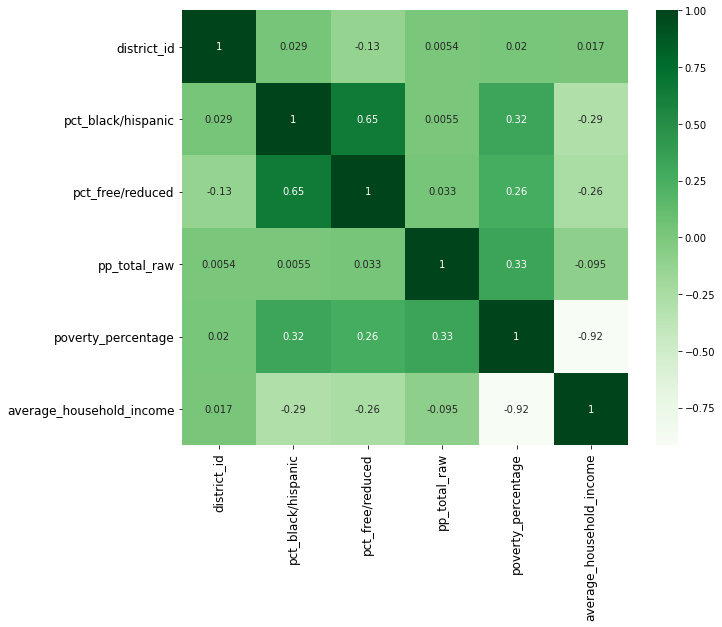

In [37]:
# Correlation 
plt.figure(figsize=(10,8))
sns.heatmap(district_df.corr(), annot=True, cmap="Greens")
plt.xticks(size=12)
plt.yticks(size=12)
plt.show()

<font color = "#283655" size=3> Based on the figure,We can see that,
    <ul>
    <li>People's poverty levels are rising in tandem with their household earnings. </li>
    <li>Large correlations exist between students in the districts identified as Black or Hispanic and free or reduced-price lunch.</li></ul></font>

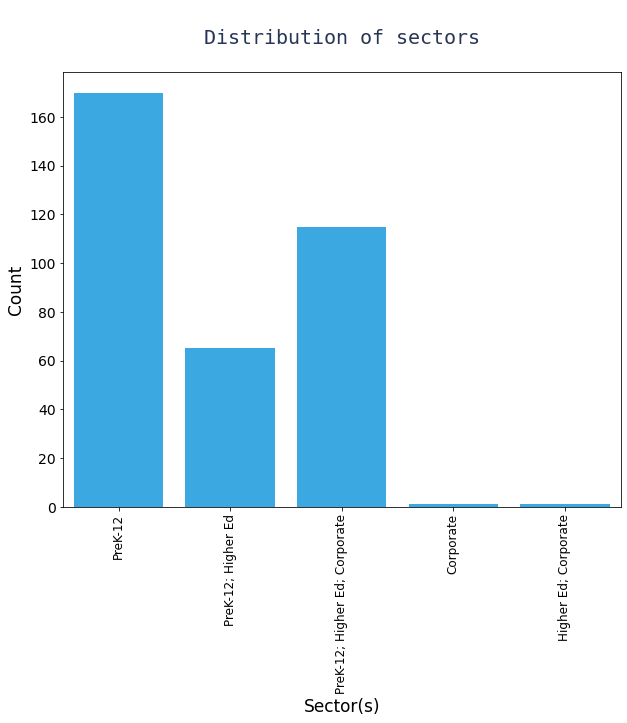

In [38]:
#Distribution of sectors 
count_plot(product_df,'Sector(s)','\n Distribution of sectors \n')

<h2> <font color = "#20b1fd">Merging Dataframes </font></h2>

In [39]:
districts = district_df.district_id.tolist()
merged_data = []
for district in districts:
    df= pd.read_csv(f'/kaggle/input/learnplatform-covid19-impact-on-digital-learning/engagement_data/{district}.csv')
    prod_eng = pd.merge(product_df, df, left_on = 'LP ID', right_on = 'lp_id')
    prod_eng['district_id'] = district
    merged = pd.merge(district_df, prod_eng, on = 'district_id')
    merged_data.append(merged)
    
merged_df = pd.concat(merged_data, axis=0)
merged_df.drop(['URL', 'lp_id'], axis = 1, inplace = True)
merged_df.head()

,district_id,state,locale,pct_black/hispanic,pct_free/reduced,county_connections_ratio,pp_total_raw,poverty_percentage,average_household_income,LP ID,Product Name,Provider/Company Name,Sector(s),Primary Essential Function,Category,time,pct_access,engagement_index
0,8815,Illinois,Suburb,0.1,0.1,"[0.18, 1[",15000.0,11.5,74399,13117,SplashLearn,StudyPad Inc.,PreK-12,LC - Digital Learning Platforms,LC,2020-02-27,0.14,2.84
1,8815,Illinois,Suburb,0.1,0.1,"[0.18, 1[",15000.0,11.5,74399,13117,SplashLearn,StudyPad Inc.,PreK-12,LC - Digital Learning Platforms,LC,2020-03-02,0.18,6.13
2,8815,Illinois,Suburb,0.1,0.1,"[0.18, 1[",15000.0,11.5,74399,13117,SplashLearn,StudyPad Inc.,PreK-12,LC - Digital Learning Platforms,LC,2020-03-03,0.08,3.18
3,8815,Illinois,Suburb,0.1,0.1,"[0.18, 1[",15000.0,11.5,74399,13117,SplashLearn,StudyPad Inc.,PreK-12,LC - Digital Learning Platforms,LC,2020-03-04,0.14,8.02
4,8815,Illinois,Suburb,0.1,0.1,"[0.18, 1[",15000.0,11.5,74399,13117,SplashLearn,StudyPad Inc.,PreK-12,LC - Digital Learning Platforms,LC,2020-03-05,0.39,69.37


In [40]:
#missing values in engagement dataframe
missing_values_table(merged_df)


The dataframe has 18 columns.
There are 4 columns that have missing values.



,Missing Values,% of Total Values
engagement_index,888643,19.0
Sector(s),205263,4.4
Primary Essential Function,205263,4.4
pct_access,2393,0.1


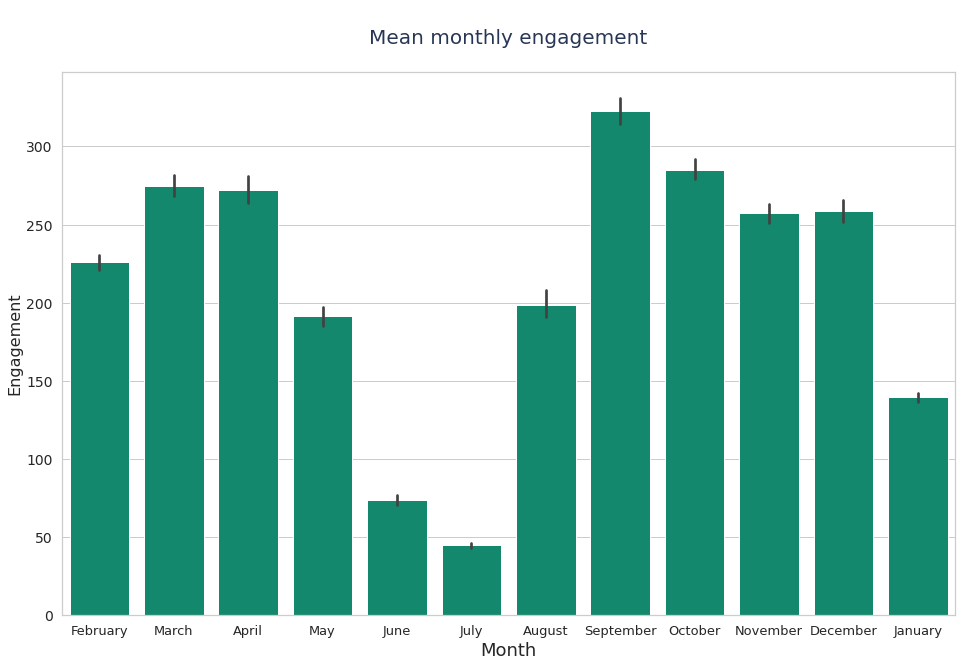

In [41]:
#separate datetime column
merged_df['time'] = pd.to_datetime(merged_df['time'])
merged_df['Month'] = merged_df['time'].dt.month_name()
merged_df['Day'] = merged_df['time'].dt.day_name()

#Mean monthly engagement
sns.set(style="whitegrid")
plt.figure(figsize=(16, 10))
ax = sns.barplot(x="Month", y="engagement_index", data=merged_df,color="#009B77")
plt.title('\nMean monthly engagement\n', fontsize = 20,fontname = 'fantasy', color = '#283655')
plt.xlabel('Month', fontsize=18)
plt.ylabel('Engagement', fontsize=16)
plt.xticks(fontsize=13)
plt.yticks(fontsize=14)
plt.show()

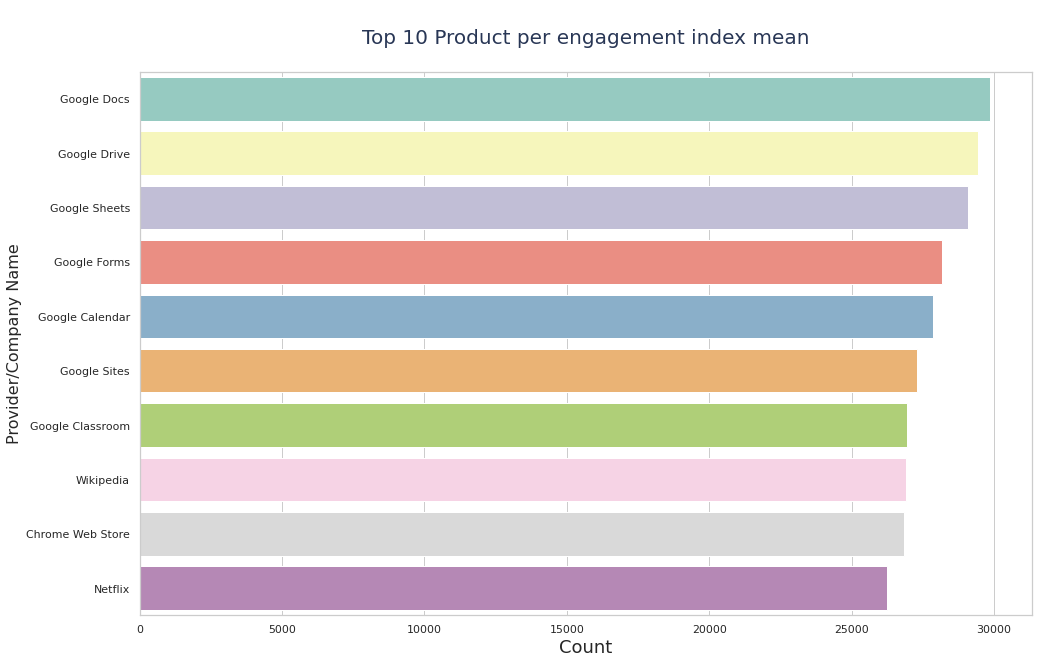

In [42]:
'top 10 Product per engagement index mean'''
top_10_products = merged_df.groupby('Product Name')['engagement_index'].mean().reset_index()
top_10_products.sort_values(by='engagement_index',ascending=False).head(10)

plt.figure(figsize=(16, 10))
sns.countplot(y='Product Name', data=merged_df, order=merged_df["Product Name"].value_counts().index[:10],palette='Set3')
plt.title('\nTop 10 Product per engagement index mean\n', fontsize = 20,fontname = 'fantasy', color = '#283655')
plt.xlabel('Count', fontsize=18)
plt.ylabel('Provider/Company Name', fontsize=16)
plt.show()

In [43]:
def line_plot(df:pd.DataFrame, column:str,linegroup:str ,Title:str) -> None:   
    
    """
    Function which can be used to draw a lineplot

    Inputs: 
    df - pandas DataFrame 
    column : Column name in string format
    linegroup : Column name for the linegroup in string format
    title : title of the plot in string format

    Returns:None

    """
    
    fig = px.line(df, x="time", y=column, color=linegroup, line_group=linegroup)
    fig = px.line(df, x="time", y=column, color=linegroup, line_group=linegroup)
    fig.update_layout(plot_bgcolor = 'white', title = Title,title_font_color = '#283655', title_font_size = 20, title_x = 0.5)
    fig.show()

    

In [44]:
#Pct_access of products by locale
locale_acсess= merged_df.groupby(['locale', 'time']).agg({'pct_access': 'mean'}).reset_index()
line_plot(locale_acсess, "pct_access","locale" ,'\nPct_access of products by locale')

In [45]:
#Engagement index of products by States
engagement_state = merged_df.groupby(['state', 'time']).agg({'engagement_index': 'mean'}).reset_index()
line_plot(engagement_state,"engagement_index" ,"state",'\nEngagement index of products by States')



In [46]:
#Engagement index of products by locale
engagement_locale = merged_df.groupby(['locale', 'time']).agg({'engagement_index': 'mean'}).reset_index()
line_plot(engagement_locale, "engagement_index","locale" ,'\nEngagement index of products by locale')

In [47]:
merged_df.head()

,district_id,state,locale,pct_black/hispanic,pct_free/reduced,county_connections_ratio,pp_total_raw,poverty_percentage,average_household_income,LP ID,Product Name,Provider/Company Name,Sector(s),Primary Essential Function,Category,time,pct_access,engagement_index,Month,Day
0,8815,Illinois,Suburb,0.1,0.1,"[0.18, 1[",15000.0,11.5,74399,13117,SplashLearn,StudyPad Inc.,PreK-12,LC - Digital Learning Platforms,LC,2020-02-27,0.14,2.84,February,Thursday
1,8815,Illinois,Suburb,0.1,0.1,"[0.18, 1[",15000.0,11.5,74399,13117,SplashLearn,StudyPad Inc.,PreK-12,LC - Digital Learning Platforms,LC,2020-03-02,0.18,6.13,March,Monday
2,8815,Illinois,Suburb,0.1,0.1,"[0.18, 1[",15000.0,11.5,74399,13117,SplashLearn,StudyPad Inc.,PreK-12,LC - Digital Learning Platforms,LC,2020-03-03,0.08,3.18,March,Tuesday
3,8815,Illinois,Suburb,0.1,0.1,"[0.18, 1[",15000.0,11.5,74399,13117,SplashLearn,StudyPad Inc.,PreK-12,LC - Digital Learning Platforms,LC,2020-03-04,0.14,8.02,March,Wednesday
4,8815,Illinois,Suburb,0.1,0.1,"[0.18, 1[",15000.0,11.5,74399,13117,SplashLearn,StudyPad Inc.,PreK-12,LC - Digital Learning Platforms,LC,2020-03-05,0.39,69.37,March,Thursday


In [48]:
Feature_df = merged_df[['time', 
       'state', 'locale', 'pct_black/hispanic','Product Name',
        'Sector(s)',"Provider/Company Name", 'Category','engagement_index']]

Feature_df['time'] = pd.to_datetime(Feature_df['time'])
Feature_df['Month'] = Feature_df['time'].dt.month
Feature_df['Day'] = Feature_df['time'].dt.day
Feature_df.drop('time', inplace=True, axis=1)
Feature_df.dropna(inplace=True)
Feature_df.head()

,state,locale,pct_black/hispanic,Product Name,Sector(s),Provider/Company Name,Category,engagement_index,Month,Day
0,Illinois,Suburb,0.1,SplashLearn,PreK-12,StudyPad Inc.,LC,2.84,2,27
1,Illinois,Suburb,0.1,SplashLearn,PreK-12,StudyPad Inc.,LC,6.13,3,2
2,Illinois,Suburb,0.1,SplashLearn,PreK-12,StudyPad Inc.,LC,3.18,3,3
3,Illinois,Suburb,0.1,SplashLearn,PreK-12,StudyPad Inc.,LC,8.02,3,4
4,Illinois,Suburb,0.1,SplashLearn,PreK-12,StudyPad Inc.,LC,69.37,3,5


In [49]:
from sklearn.preprocessing import OrdinalEncoder

ord_enc = OrdinalEncoder()
Feature_df["state"] = ord_enc.fit_transform(Feature_df[['state']])
Feature_df["locale"] = ord_enc.fit_transform(Feature_df[['locale']])
Feature_df["Product Name"] = ord_enc.fit_transform(Feature_df[['Product Name']])
Feature_df["Sector(s)"] = ord_enc.fit_transform(Feature_df[['Sector(s)']])
Feature_df["Category"] = ord_enc.fit_transform(Feature_df[['Category']])
Feature_df["Provider/Company Name"] = ord_enc.fit_transform(Feature_df[['Provider/Company Name']])
Feature_df.head()

,state,locale,pct_black/hispanic,Product Name,Sector(s),Provider/Company Name,Category,engagement_index,Month,Day
0,1.0,2.0,0.1,273.0,2.0,220.0,1.0,2.84,2,27
1,1.0,2.0,0.1,273.0,2.0,220.0,1.0,6.13,3,2
2,1.0,2.0,0.1,273.0,2.0,220.0,1.0,3.18,3,3
3,1.0,2.0,0.1,273.0,2.0,220.0,1.0,8.02,3,4
4,1.0,2.0,0.1,273.0,2.0,220.0,1.0,69.37,3,5


In [50]:
# scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = Feature_df.copy().drop(['engagement_index'], axis=1)
y = Feature_df.copy()[['engagement_index']]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
y = scaler.fit_transform(y).flatten()

In [51]:
# spliting the data into train and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.1, random_state=42)

In [52]:
# create the classifier
from sklearn.ensemble import RandomForestRegressor
from matplotlib import pyplot
regressor = RandomForestRegressor(n_jobs = -1, max_depth = 5)

In [53]:
# Train the model using the training sets
regressor.fit(X_train, y_train)

RandomForestRegressor(max_depth=5, n_jobs=-1)

Text(0.5, 1.0, '\nFeature importance\n')

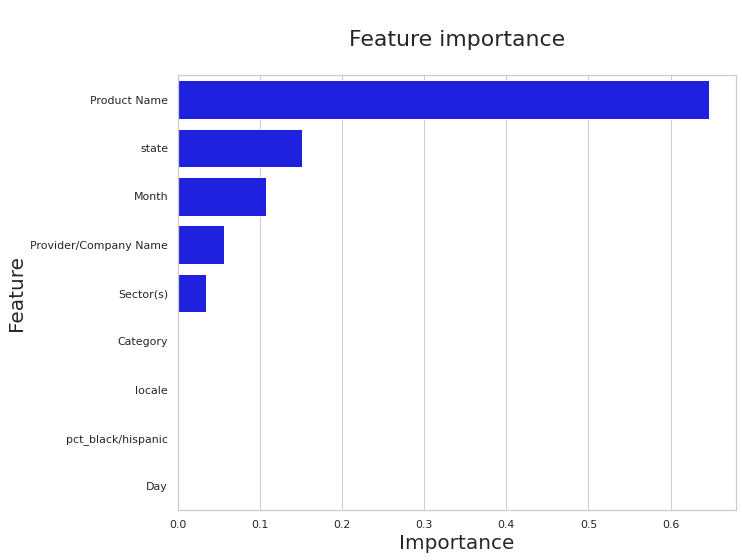

In [54]:
# get importance
importances = regressor.feature_importances_
labels = X.columns
feature_df = pd.DataFrame(list(zip(labels, importances)), columns=["feature", "importance"])
feature_df = feature_df.sort_values(by='importance', ascending=False, )
plt.figure(figsize=(10, 8))
ax = sns.barplot(x="importance", y="feature", data=feature_df,palette=["blue"])
ax.set_xlabel('Importance', fontsize=20)
ax.set_ylabel('Feature', fontsize=20)  # ylabel
ax.set_title('\nFeature importance\n', fontsize=22)

<h3><font color = "#20b1fd"> In progress ... </font></h3>

 <h2> References</h2>
 
- [A guide to handling missing values in python](https://www.kaggle.com/parulpandey/a-guide-to-handling-missing-values-in-python)
- [Calculate feature importance with python](https://machinelearningmastery.com/calculate-feature-importance-with-python/)
- [Bar plots alternatives](https://towardsdatascience.com/bar-plots-alternatives-specific-types-9d10ef250e5)
- [How to approach analytics challenges](https://www.kaggle.com/iamleonie/how-to-approach-analytics-challenges)
